In [14]:
%load_ext autoreload
%autoreload 2

from IPython.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

import sys
import os

sys.path.append(os.path.join(os.path.abspath('.'),'../../plankton'))

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [15]:
import plankton as pl
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [16]:
data_folder='data/leftCA1/'

coordinates = pd.read_csv(os.path.join(data_folder,'spots_w_segmentation_leftCA1_4-3.csv'))
signatures = pd.read_csv(os.path.join(data_folder,'../signatures_proteinaltlas_xiaoyan.csv'),index_col=0)

dapi_image = plt.imread(os.path.join(data_folder,'./CA1DapiBoundaries_4-3_left.tif'))
dapi_image = 1-(dapi_image/dapi_image.max())

bg_cells= np.load('./data/leftCA1/label_image.coo.npz')
cell_mask = np.zeros(bg_cells['shape'])
cell_mask[bg_cells['row'],bg_cells['col']]=bg_cells['data']

In [17]:
sdata = pl.SpatialData(genes=coordinates.gene,
                       x_coordinates=coordinates.spotX,
                       y_coordinates=coordinates.spotY,
                      pixel_maps=[pl.PixelMap(dapi_image),pl.PixelMask(cell_mask)])

(<matplotlib.collections.PathCollection at 0x7f1b1df5a730>, None, None)

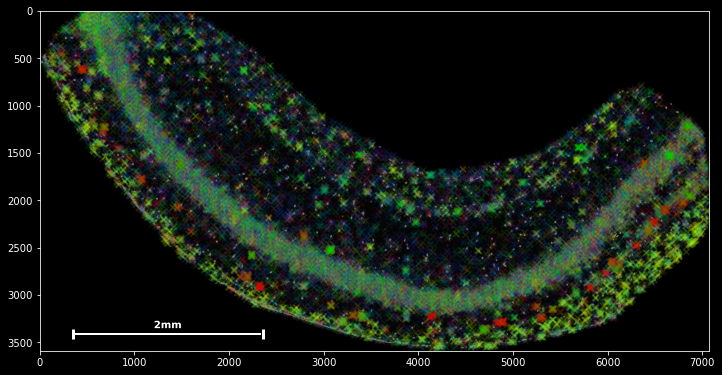

In [18]:
plt.figure(figsize=(12,10))
sdata.scatter(alpha=0.1,marker='x')

<IPython.core.display.Javascript object>


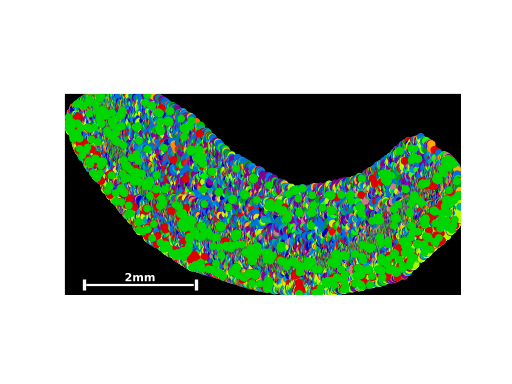

(<matplotlib.collections.PathCollection at 0x7fb8808d9d30>, None, None)

In [4]:
%matplotlib notebook

sdata.scatter()

In [7]:
knn_neighbors=200
bandwidth=60
n_neighbors=30
metric='euclidean'
min_dist=0.03
random_state=42
zero_weight=1

_=sdata.graph.update_knn(n_neighbors=knn_neighbors)

sdata.graph.run_umap(bandwidth=bandwidth,n_neighbors=n_neighbors, min_dist=min_dist, metric=metric, random_state=random_state,zero_weight=zero_weight)



In [8]:
# knn_neighbors=100
# bandwidth=4
# n_neighbors=30
# metric='euclidean'
# min_dist=0.0
# random_state=42
# zero_weight=1

# _=sdata.graph.update_knn(n_neighbors=knn_neighbors)

# sdata.graph.run_umap(bandwidth=bandwidth,n_neighbors=n_neighbors, min_dist=min_dist, metric=metric, random_state=random_state,zero_weight=zero_weight)



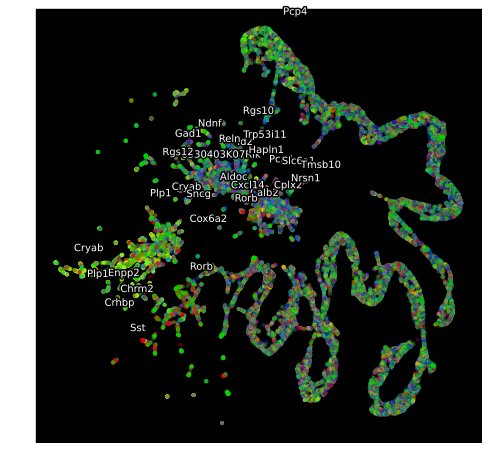

In [13]:
plt.figure(figsize=(8,8))
sdata.graph.plot_umap(text_prop='genes',alpha=0.3,marker='.',thlds_text=(0.1,0.2,0),text_distance=1.3)

In [4]:
sdata=pl.load('qian_segmemnts.pl')



Index(['g', 'x', 'y', 'gene_id', 'radiatum', 'pyramidal', 'alveus'], dtype='object')


In [11]:
# sdata['act']=(sdata.act_1|sdata.act_2|sdata.act_3|sdata.act_4)

In [19]:
# sdata.save('qian_segmemnts.pl')

In [15]:
sdata.graph.umap_js()

    'data': [{'hovertemplate': 'x: %{x}<br>y: %{y}<extra></extra>…

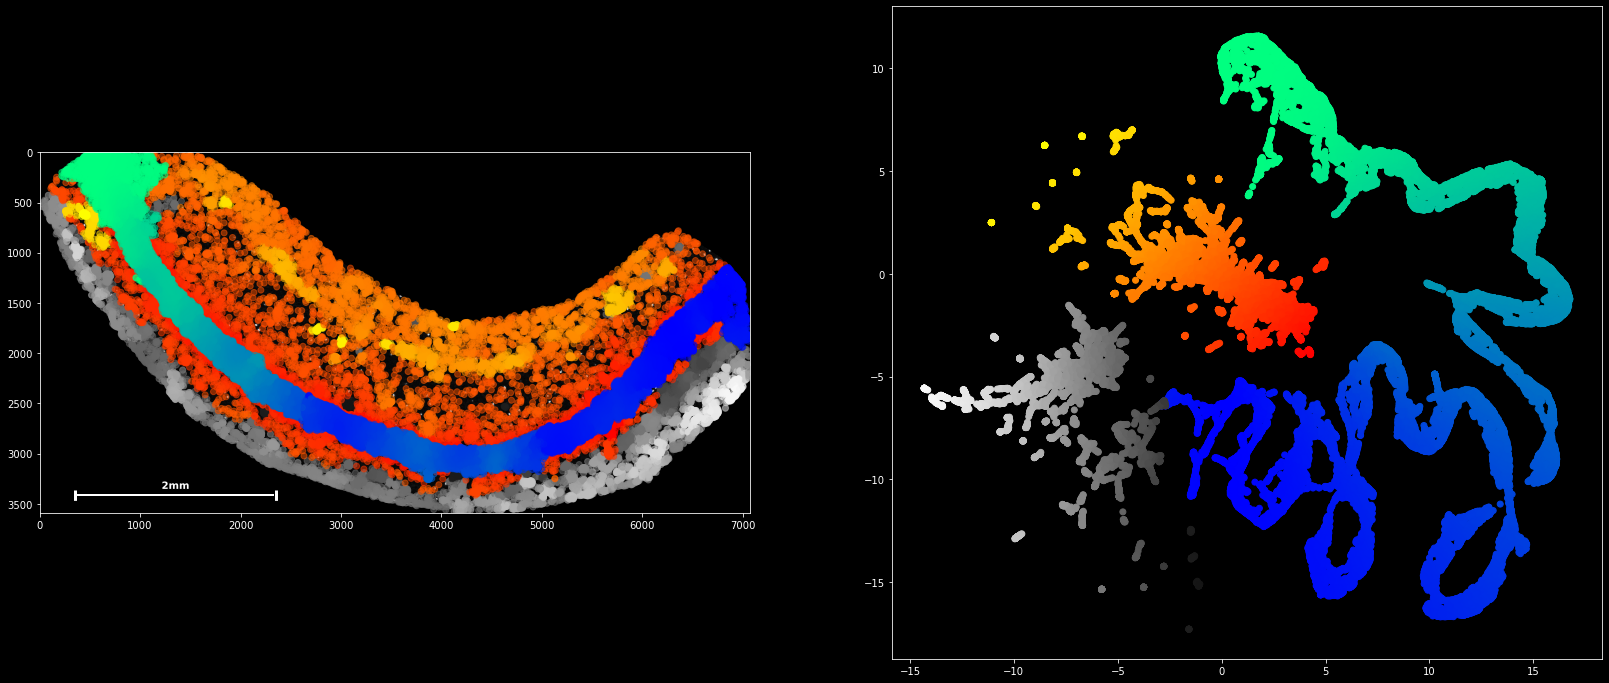

In [20]:
umap=sdata.graph.umap
centralized_umap=umap-5

plt.figure(figsize=(28,12))

dists = (centralized_umap**2).sum(1)**0.5

normalized_umap=centralized_umap/dists[:,None]
rad_umap=np.sin(normalized_umap[:,1])
rad_umap-=rad_umap.min()
rad_umap/=rad_umap.max()

calveus=-(-centralized_umap[:,0]-centralized_umap[:,1]*0)[sdata.alveus]
cradiatum=(-centralized_umap[:,0]+centralized_umap[:,1])[sdata.radiatum]

plt.subplot(121)

sdata[sdata.alveus].scatter(c=calveus,cmap='Greys',alpha=0.5,vmin=-15,vmax=0)
sdata[sdata.radiatum].scatter(c=cradiatum,cmap='autumn',alpha=0.5)
sdata[sdata.pyramidal].scatter(c=rad_umap[sdata.pyramidal]**0.7,cmap='winter',alpha=0.5)

plt.subplot(122)

# plt.scatter(*centralized_umap[sdata.alveus].T,c=centralized_umap[:,0][sdata.alveus],cmap='spring')

plt.scatter(*centralized_umap[sdata.radiatum].T,c=cradiatum,cmap='autumn')
plt.scatter(*centralized_umap[sdata.pyramidal].T,c=rad_umap[sdata.pyramidal]**0.7,cmap='winter',)
plt.scatter(*centralized_umap[sdata.alveus].T,c=calveus,cmap='Greys',vmin=-15,vmax=0)


In [112]:
cooc_plp,radii_plp=co_occurrence(sdata[sdata.g.isin(['Pvalb'])].coordinates,sdata.coordinates,max_radius=200,linear_steps=30)
cooc_plp_sst,radii_plp_sst=co_occurrence(sdata[sdata.g.isin(['Pvalb'])].coordinates,sdata[sdata.g.isin(['Npy'])].coordinates,max_radius=200,linear_steps=30)



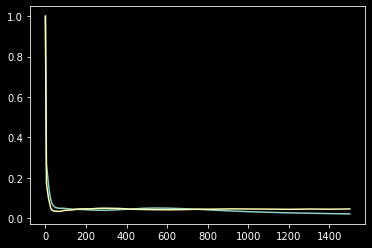

In [110]:
plt.plot(radii_inh,cooc_inh[0,1]/cooc_inh[0,1,0])
plt.plot(radii_inh_pyr,cooc_inh_pyr[0,1]/cooc_inh_pyr[0,1,0])

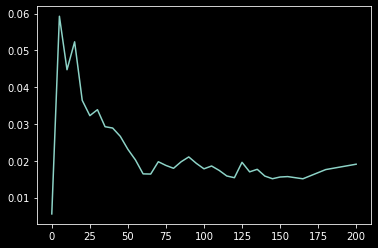

In [113]:
# plt.plot(radii_plp,cooc_plp[0,1])
# plt.plot(radii_plp,cooc_plp[0,0]/cooc_plp[0,1])
# plt.plot(radii_plp_sst,cooc_plp_sst[0,0]/cooc_plp_sst[0,1])

plt.plot(radii_plp,cooc_plp_sst[0,1]/cooc_plp[0,1])

In [27]:
subset=sdata[sdata.act_1]

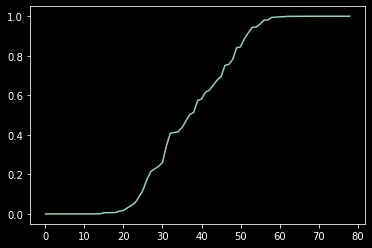

In [43]:
plt.plot(sorted( binom.cdf(subset.stats.counts,sdata.stats.counts[subset.stats.index],len(subset)/len(sdata))))

In [5]:
import stats
import time 

t1=time.perf_counter()
coocs,radii=stats.co_occurrence(sdata[sdata.g.isin(sdata.genes[:20])])
print(time.perf_counter()-t1)

20.20751288199972


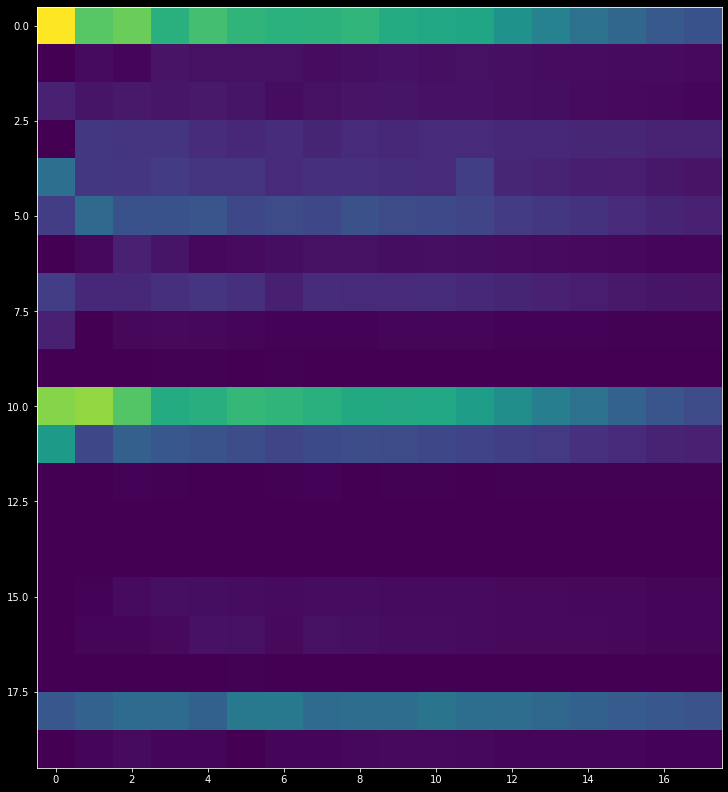

In [11]:
plt.figure(figsize=(19,14))



plt.imshow(coocs[4])
# plt.imshow(hists[0],cmap='jet')

In [8]:
import stats

In [10]:
stats.co_occurrence

<function stats.co_occurrence(sdata, resolution=5, max_radius=400, linear_steps=5)>

In [9]:
plt.figure(figsize=(22,22))
plt.imshow(coocs[0]*radii)


NameError: name 'coocs' is not defined

<Figure size 1584x1584 with 0 Axes>

In [135]:
from scipy import signal

signal._signaltools._apply_conv_mode(hists[0],)

TypeError: _apply_conv_mode() missing 4 required positional arguments: 's1', 's2', 'mode', and 'axes'

In [65]:
h1_product = (coocs*radii[0])

In [82]:
coocs[0].sum(),radii.sum()

(291.0, 4751.0)

In [94]:
# np.where(coocs[0])[0].shape
(radii*coocs).sum(-1).sum(-1)

array([3.07000000e+02, 1.71997525e+03, 3.33564328e+03, 5.13919737e+03,
       6.52911147e+03, 8.69753136e+03, 9.78112099e+03, 2.96428162e+04,
       4.74802828e+04, 7.99579432e+04, 1.21171173e+05, 1.68822573e+05,
       2.12026986e+05, 2.46658836e+05, 2.71260768e+05, 2.94576165e+05,
       3.19164435e+05, 3.42004240e+05, 3.70445038e+05, 3.94916058e+05,
       4.14815237e+05, 4.37713566e+05, 4.58940273e+05, 4.81338409e+05,
       5.27610668e+04])